<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Z_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://www.dropbox.com/sh/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa?dl=0

--2021-05-12 13:11:40--  https://www.dropbox.com/sh/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa [following]
--2021-05-12 13:11:41--  https://www.dropbox.com/sh/raw/wqyhd8jtra0wijl/AAC68bnZvrCOQG9ETHx5UX2xa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6cb9d332c3aceaa02c50b4e39b.dl.dropboxusercontent.com/zip_download_get/AxsDRC-qDxdYWWFneRWAMXk4lmxsASZbxQP1MLD8o1EyrTRSyb-hcAIGTGEnZx22MWxnHcn6nLGrB5tIj9cSzyEVNHgay40Rf4lgdDg8wp9xzQ [following]
--2021-05-12 13:11:48--  https://uc6cb9d332c3aceaa02c50b4e39b.dl.dropboxusercontent.com/zip_download_get/AxsDRC-qDxdYWWFneRWAMXk4lmxsASZbxQP1MLD8o1EyrTRSyb-hcAIGTGEnZx22MWxnHcn6nLGrB5tIj

In [7]:
!unzip AAC68bnZvrCOQG9ETHx5UX2xa?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Test/Normal/NORMAL_test_693.jpg  
 extracting: Test/Normal/NORMAL_test_652.jpg  
 extracting: Test/Normal/NORMAL_test_642.jpg  
 extracting: Train/Covid/COVID_train_344.jpg  
 extracting: Test/Normal/NORMAL_test_401.jpg  
 extracting: Train/Covid/COVID_train_332.jpg  
 extracting: Train/Covid/COVID_train_856.jpg  
 extracting: Train/Covid/COVID_train_962.jpg  
 extracting: Test/Normal/NORMAL_test_768.jpg  
 extracting: Train/Covid/COVID_train_302.jpg  
 extracting: Train/Covid/COVID_train_710.jpg  
 extracting: Train/Covid/COVID_train_877.jpg  
 extracting: Test/Normal/NORMAL_test_158.jpg  
 extracting: Train/Covid/COVID_train_840.jpg  
 extracting: Test/Normal/NORMAL_test_536.jpg  
 extracting: Train/Covid/COVID_train_494.jpg  
 extracting: Test/Normal/NORMAL_test_728.jpg  
 extracting: Test/Normal/NORMAL_test_132.jpg  
 extracting: Test/Normal/NORMAL_test_736.jpg  
 extracting: Train/Covid/COVID_train_964.jpg  
 extracti

In [99]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [91]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [100]:
train = image_generator.flow_from_directory('Train', 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('Val', 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 5581 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.


In [118]:
train.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [101]:
num_covid=len(os.listdir(os.path.join('Train', 'Covid')))
num_normal=len(os.listdir(os.path.join('Train', 'Normal')))

In [66]:
weight_for_0 = num_covid / (num_normal + num_covid)
weight_for_1 = num_normal / (num_normal + num_covid)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 54, 54, 64)      

In [104]:
r = model.fit(
    train, 
    epochs=17,
    validation_data=validation,
    validation_steps=100,
)

Epoch 1/17
175/175 [==============================] - 88s 501ms/step - loss: 0.7610 - accuracy: 0.6255 - val_loss: 0.5462 - val_accuracy: 0.6800
Epoch 2/17
175/175 [==============================] - 87s 496ms/step - loss: 0.4281 - accuracy: 0.8062 - val_loss: 0.3842 - val_accuracy: 0.8700
Epoch 3/17
175/175 [==============================] - 87s 498ms/step - loss: 0.3469 - accuracy: 0.8566 - val_loss: 0.3628 - val_accuracy: 0.9000
Epoch 4/17
175/175 [==============================] - 87s 497ms/step - loss: 0.2802 - accuracy: 0.8888 - val_loss: 0.1836 - val_accuracy: 0.9500
Epoch 5/17
175/175 [==============================] - 87s 497ms/step - loss: 0.2437 - accuracy: 0.9048 - val_loss: 0.1974 - val_accuracy: 0.9400
Epoch 6/17
175/175 [==============================] - 87s 498ms/step - loss: 0.2233 - accuracy: 0.9201 - val_loss: 0.2191 - val_accuracy: 0.9200
Epoch 7/17
175/175 [==============================] - 87s 496ms/step - loss: 0.2056 - accuracy: 0.9237 - val_loss: 0.3352 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

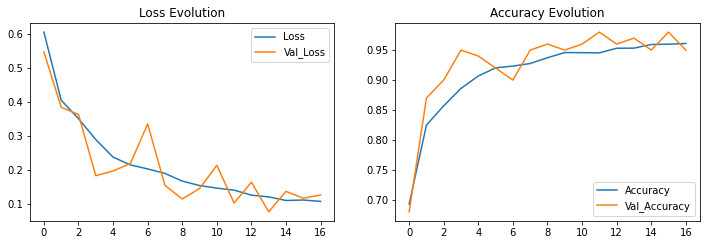

In [105]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [106]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1860/1860 [==============================] - 25s 13ms/step - loss: 0.1595 - accuracy: 0.9462
Test Accuracy: 94.62%
175/175 [==============================] - 81s 464ms/step - loss: 0.0690 - accuracy: 0.9751
Train Accuracy: 97.51%


In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

pred = model.predict(test)


y = OneHotEncoder().fit_transform(test).toarray()

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(y.classes,pred > 0.5,output_dict=True))

NameError: ignored